**Importing modules and libraries**

In [1]:
#pip install haversine

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
from itertools import product
import string
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime, date
from pylab import rcParams
import haversine as hs
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**Loading the datasets anmd merging both datsets into one dataset**

In [4]:
# Load training dataset downloaded from Kaggle
data_train = pd.read_csv("fraudTrain.csv")
data_test = pd.read_csv("fraudTest.csv") # use sep="," for coma separation.
# drop the unnecessary column "unnamed"
data_train.drop('Unnamed: 0', axis=1, inplace=True)
data_test.drop('Unnamed: 0', axis=1, inplace=True)
# concanate both 
data = pd.concat([data_train,data_test])

# Initial analysis
Initial analysis has three parts.
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

We will analyse the behaviour of each variable, source of variable, assigne the correct data type and appropriate column name. For numerical variable, we can use five number summary and for categorical variable, we will check the levels and frequencies. Check if there are missing values, duplicates, errors or inconsistencies in data values of each variable. At this stage, we also detect outliers using boxplot and decide the treatment of outliers.

In [5]:
display(data.head(5))

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
data.describe().round(0)
#data.describe().round(0).T.to_csv("Description of data.csv",index=True)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.0,1852394.0,1852394.0,1852394.0,1852394.0,1.852394e+06,1852394.0,1852394.0,1852394.0
mean,4.173860e+17,70.0,48813.0,39.0,-90.0,88644.0,1.358674e+09,39.0,-90.0,0.0
std,1.309115e+18,159.0,26882.0,5.0,14.0,301488.0,1.819508e+07,5.0,14.0,0.0
min,6.041621e+10,1.0,1257.0,20.0,-166.0,23.0,1.325376e+09,19.0,-167.0,0.0
25%,1.800429e+14,10.0,26237.0,35.0,-97.0,741.0,1.343017e+09,35.0,-97.0,0.0
50%,3.521417e+15,47.0,48174.0,39.0,-87.0,2443.0,1.357089e+09,39.0,-87.0,0.0
75%,4.642255e+15,83.0,72042.0,42.0,-80.0,20328.0,1.374581e+09,42.0,-80.0,0.0
max,4.992346e+18,28949.0,99921.0,67.0,-68.0,2906700.0,1.388534e+09,68.0,-67.0,1.0


In [7]:
data.describe(include= 'all')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1852394,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,...,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1852394,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,1819551,NaN,693,14,NaN,355,486,2,999,906,...,NaN,NaN,NaN,497,984,1852394,NaN,NaN,NaN,NaN
top,2020-06-01 01:37:47,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,dbd391ce3c1f7aae6a92b69e15190c83,NaN,NaN,NaN,NaN
freq,4,NaN,6262,188029,NaN,38112,40940,1014749,4392,8040,...,NaN,NaN,NaN,13898,8044,1,NaN,NaN,NaN,NaN
mean,NaN,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,...,3.853931e+01,-9.022783e+01,8.864367e+04,NaN,NaN,NaN,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,NaN,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,NaN,...,5.071470e+00,1.374789e+01,3.014876e+05,NaN,NaN,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,NaN,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.410000e+02,NaN,NaN,NaN,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,NaN,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.443000e+03,NaN,NaN,NaN,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,NaN,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

**Description of Variables**
- Unamed: This is first column works as counter for number of observations.
- 'trans_date: The date when this transaction occurred.
- 'trans_time': The date when this transaction occurred.
- 'cc_num': Credit card number
- 'merchant': The name of company or merchant 
- ‘category': The category of business or merchant
- 'amt': The amount of transaction
- 'first': First name of customer
- 'last': Last name of customer
- 'gender': Gender of customer
- 'street', 'city', 'state', 'zip': Theses four variables describe the street, city, state and zip code of customer address
- 'lat', 'long': These two variables describe the latitude and longitude of customer location
- 'city_pop': The population of city where customer lives
-'job': The job of customer
-'dob': Date of birth of customer
-'trans_num': The transaction number
-'unix_time': The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. The unix_time describes the time duration in seconds between a particular date and the Unix Epoch.
merch_lat', 'merch_long': These two variables describe the latitude and longitude of merchant/ business location.
-'is_fraud': The class variable which identifies a transaction is a fraud or not. This is a binary variable where 0 is for no and 1 is for yes.


In [9]:
#features_cols = ['category', 'amt', 'gender', 'lat', 'long', 'job', 'age','merch_lat', 'merch_long', 'is_fraud']

**Check missing values**

In [10]:
# Check missing values in training datset
data.isnull().sum().sort_values(ascending=False)

is_fraud                 0
merch_long               0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
trans_date_trans_time    0
dtype: int64

In [11]:
for col in data:
    print(len(data[col].unique()))

1819551
999
693
14
60616
355
486
2
999
906
51
985
983
983
891
497
984
1852394
1819583
1754157
1809753
2


In [12]:
# Name of variables (columns) in training dataset
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
# Dimension of train datesaet
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1852394 rows and 22 columns


In [14]:
# Checking Duplicate values
duplicated = data.duplicated().sum()
duplicated

0

In [5]:
def dataset_overview(df):
    #display(df.head())
    variables = df.shape[1]
    observations = df.shape[0]
    missings = df.isnull().sum().sum()
    missings_per = round(100 * df.isnull().sum().sum()/len(df),3)
    duplicated = df.duplicated().sum()
    duplicated_per = round(100 * df.duplicated().sum()/len(df),3)
    categ = len(df.select_dtypes(include=[np.number]).columns.values)
    numer = len(df.select_dtypes(exclude=[np.number]).columns.values)
    #names = ['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols']
    stats = list([variables, observations, missings, missings_per,duplicated,duplicated_per, categ, numer])
    over_df = pd.DataFrame({'General Overview':['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols'],
                           '': stats})
    over_df = over_df.set_index('General Overview')
    print(over_df)
        #################### categorical columns  ###############################################################
    print('\nVariable overview\n')
    print('Categorical variables')
    for x in list(data.select_dtypes(exclude=[np.number]).columns.values):
        print(x,'\n')
        print(f'unique values:         {len(df[x].unique())}')
        print(f'Missing values:        {df[x].isnull().sum()}')
        print(f'Missing values(%):     {df[x].isnull().sum()/len(data[x])}%')
        print(f'Mode:                  {df[x].mode()[0]}')
        print(f'Frequency:             {df[x].value_counts()[0]}\n')
        print(f'Data type:             {df[x].dtype}')
    
    #################### numerical columns  ###############################################################
    print('\nNumerical variables\n')
    for y in list(data.select_dtypes(include=[np.number]).columns.values):
        print(y,'\n')
        print(f'unique values:     {len(df[x].unique())}')
        print(f'Missing values:    {df[y].isnull().sum()}')
        print(f'Missing values(%): {df[y].isnull().sum()/len(data[y])}%')
        print(f'Minimum:           {df[y].min()}')
        print(f'Median:            {df[y].median()}')
        print(f'Mean:              {df[y].mean()}')
        print(f'Max:               {df[y].max()}')
        print(f'Data type:         {df[x].dtype}')

In [4]:
dataset_overview(data)

                             
General Overview             
Variables                22.0
Observations        1852394.0
Missings cells            0.0
Missing cells(%)          0.0
Duplicated rows           0.0
Duplicated rows(%)        0.0
Num cols                 10.0
Categ cols               12.0

Variable overview

Categorical variables
trans_date_trans_time 

unique values:         1819551
Missing values:        0
Missing values(%):     0.0%
Mode:                  2019-04-22 16:02:01
Frequency:             4

Data type:             object
merchant 

unique values:         693
Missing values:        0
Missing values(%):     0.0%
Mode:                  fraud_Kilback LLC
Frequency:             6262

Data type:             object
category 

unique values:         14
Missing values:        0
Missing values(%):     0.0%
Mode:                  gas_transport
Frequency:             188029

Data type:             object
first 

unique values:         355
Missing values:        0
Missing valu

# Data Cleaning                       

## Check whether the provided array or dtype is of a numeric dtype.

In [5]:
numeric = []
category = []
for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        numeric.append(col)
    else:
         category.append(col)
print("List of categorical variables:",category)  
print("List of Numeric varaibles", numeric)

List of categorical variables: ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
List of Numeric varaibles ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [6]:
# Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [7]:
# clean date of DOB and trans_date_trans_time
dates_list = ['trans_date_trans_time','dob']
for x in dates_list:
    data[x] = pd.to_datetime(data[x])

In [8]:
# get hours from the transaction
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
# days when the transaction occured 
data['day_of_week'] =data['trans_date_trans_time'].dt.day_name()
# period when the transaction occured
data['year_month'] =data['trans_date_trans_time'].dt.to_period('M')
# the age of the client when the transaction occured
data['age'] = (np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y')))
# get the full name 
data['names'] = data['first'] + ' ' + data['last']
data.drop(['first','last'], axis=1, inplace=True)
# create the column where the if the population is less than 25% to be rural, 25-50% ssemi-urban, and more than 50% urban
data['residence'] = pd.qcut(data.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

# concanate the lat and longitude of client into one column and the same for the merchant location
data['lat_long'] = tuple(zip(*data[['lat','long']].values.T))
data['merch_ad'] = tuple(zip(*data[['merch_lat','merch_long']].values.T))

In [9]:
# create the distance column
data['distance'] = haversine_vectorize(data['long'],data['lat'],data['merch_long'],data['merch_lat'])

In [10]:
################
for col in data:
    if pd.api.types.is_numeric_dtype(data[col]):
        print(" ", col, "   ", data[col].var())
        
#data['amt'].var()
#variance.to_csv("variance.csv",index=True)

  cc_num     1.713782777888671e+36
  amt     25361.828481306125
  zip     722633642.5328995
  lat     25.719811930661017
  long     189.00461370223033
  city_pop     90894784014.48291
  unix_time     331060986699915.3
  merch_lat     26.067190954893043
  merch_long     189.3291270330779
  is_fraud     0.005182873260551606
  trans_hour     46.45448822297602
  age     303.1912399857993
  distance     846.7337186237439


# Exploratory Data Analysis (EDA)

## Univariate Analysis

* Amount of Transaction

In [20]:
pd.concat(
[data['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


* Fraud Transaction mean is way higher than non-fraud transaction

* Mean of Non Fraud Transactions: 67.6

* Mean of Fraud Transactions: 530.6

In [10]:
# Distribution graphs (histogram/bar graph) of column data
def plotDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 30]] # For displaying purposes, pick columns that have between 1 and 30 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    #plt.savefig("hist.png" )
    plt.show()

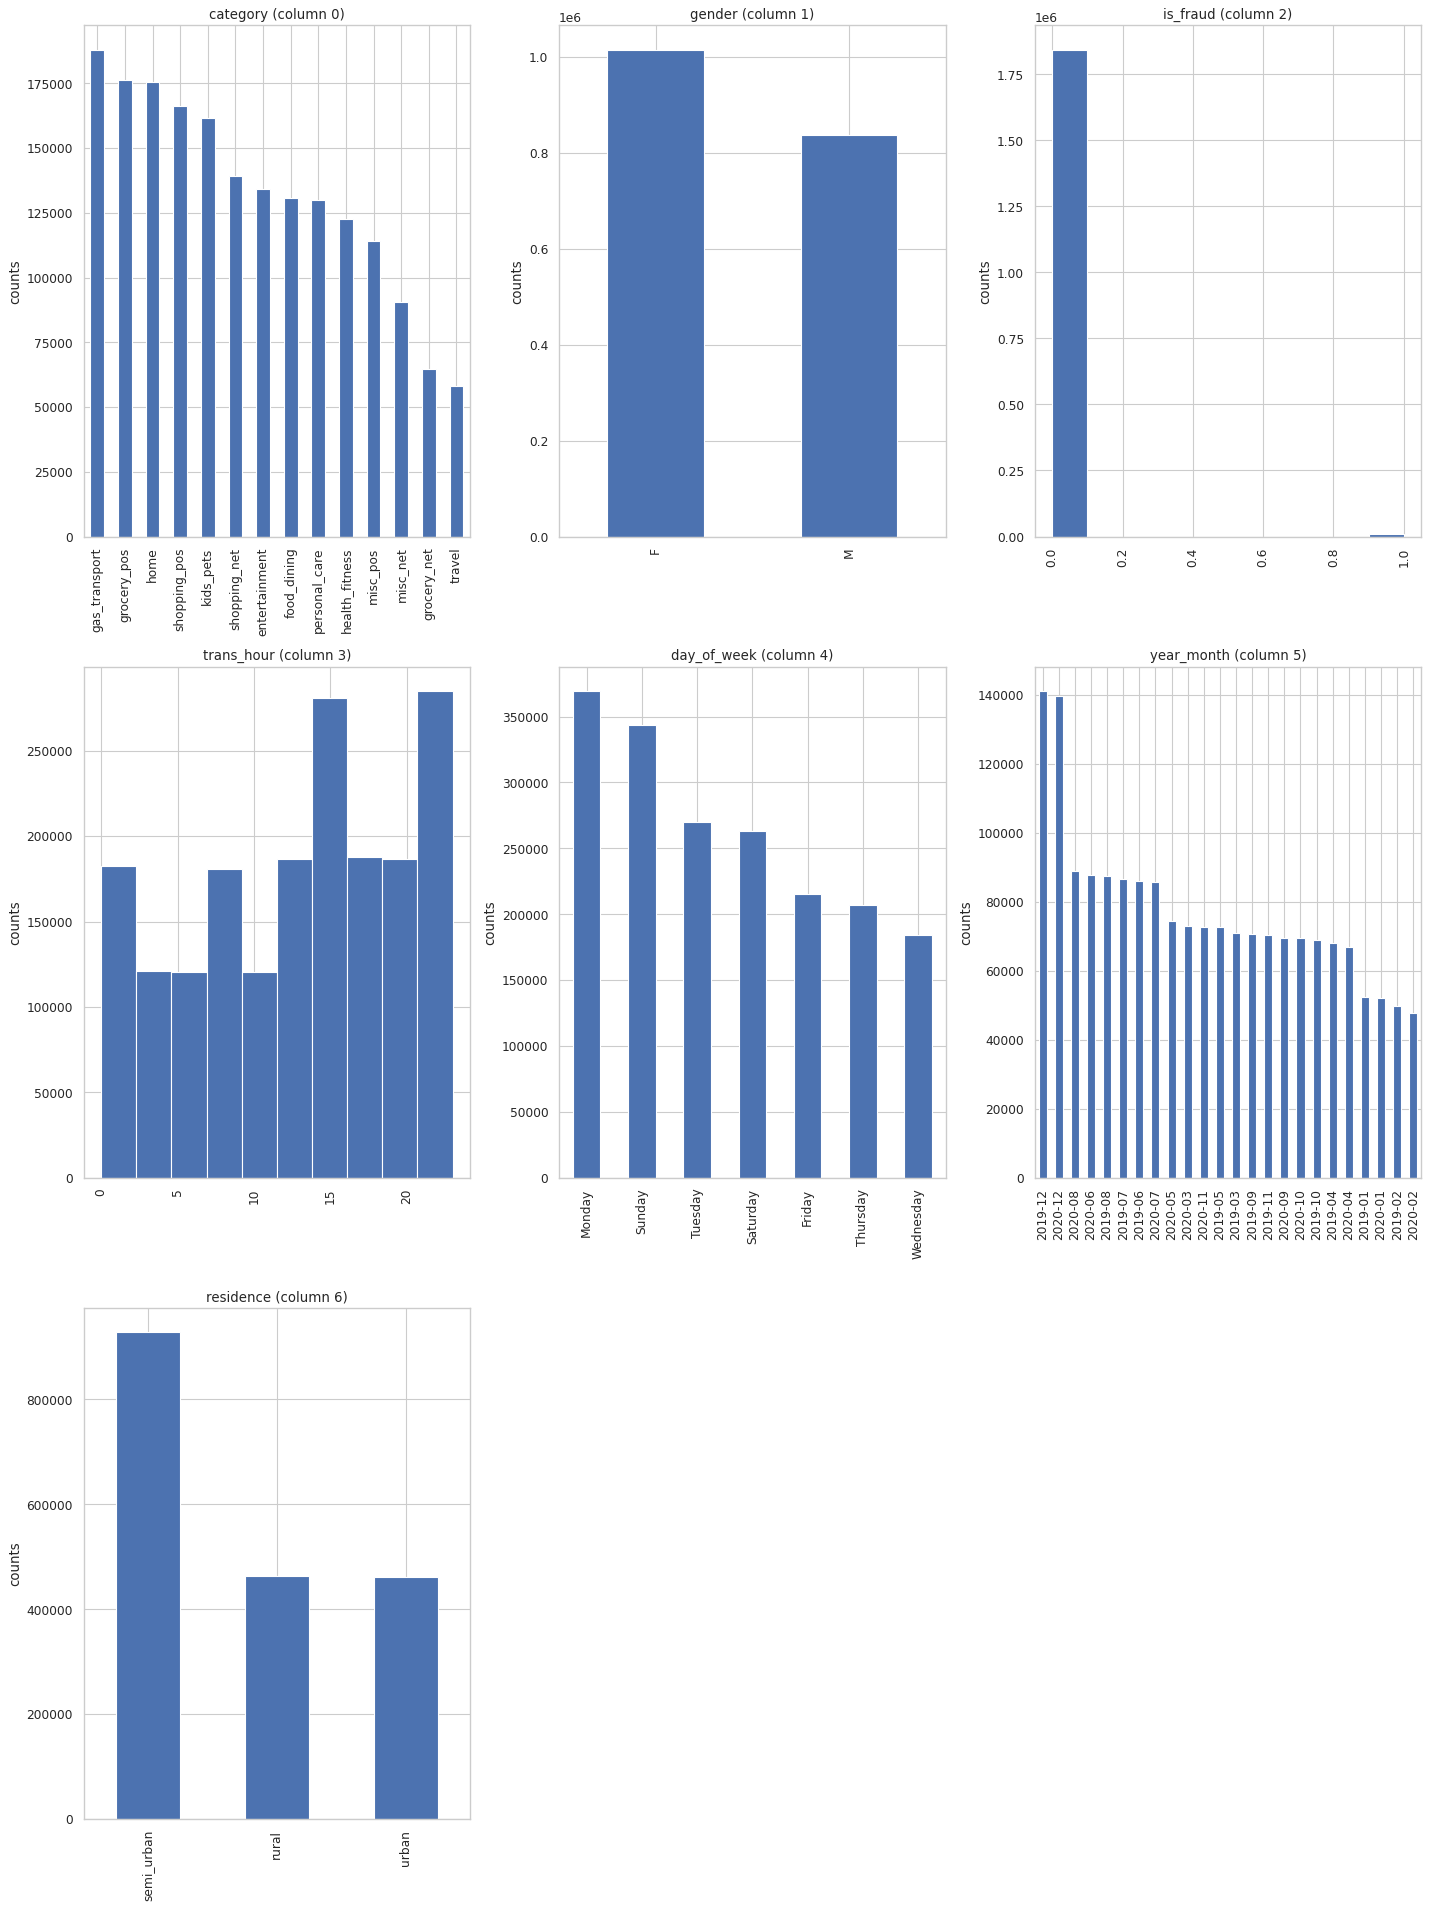

In [11]:
sns.set(style='whitegrid')
plotDistribution(data, 10, 3)

* Gas and transport is where there was the highest number of transaction, and travel the lowest
* Female made fewer transaction than male
* There is an imbalance between this dataset between the fraudulent and non-fraudulent transaction
* More transaction are made in the night during the week mre transaction are made monday and sunday
* At the end of year there more transaction made
* The last but not least we can see that our columns are all right skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x7fefd96e7850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fefd9687390>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fefd96d49d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fefd9687e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fefd968f3d0>],
 'means': []}

Text(0.5, 1.0, 'Distribution of Distance')

Text(0.5, 1.0, 'Range of The date of distance')

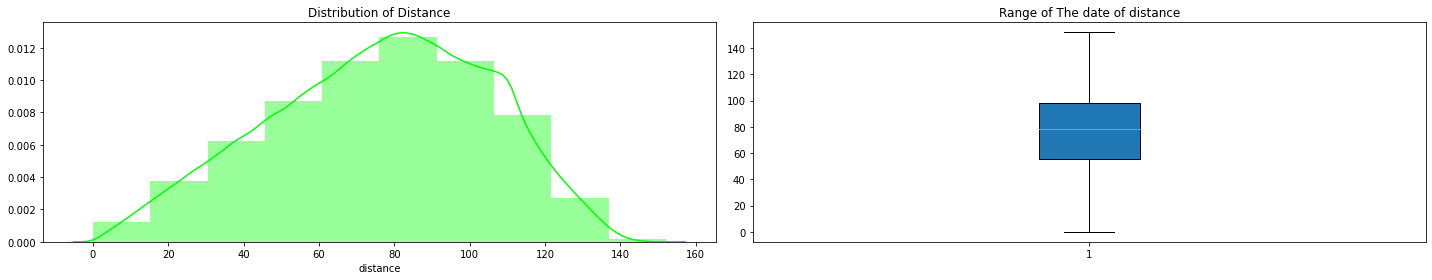

In [11]:
fig, axes = plt.subplots(1,2, figsize=(20,4))
#sns.histplot(data=data['distance'], x="Distance", color="lime")
sns.distplot(data['distance'],bins=10,ax=axes[0],color="lime")
plt.boxplot(data['distance'],patch_artist = True)

axes[0].set_title('Distribution of Distance')
axes[1].set_title('Range of The date of distance')
plt.tight_layout()
#plt.savefig("hist of Distance.png" )
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

#sns.distplot(data['category'],ax=axes[0])  


plt.boxplot(data['category'],patch_artist=True) 
plt.set_title('Boxplot of category ')
plt.tight_layout()
#plt.savefig("hist of Adults.png" )
plt.show()

## Bivariate Analysis

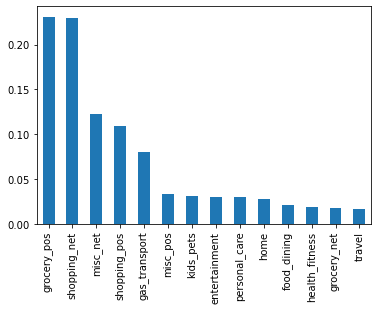

In [12]:
data[(data['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

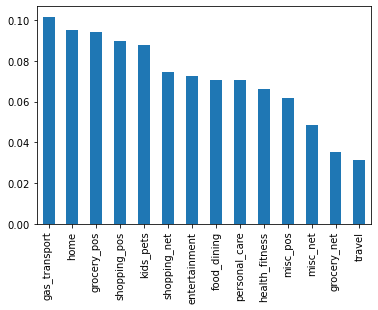

In [13]:
data[(data['is_fraud']==0)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

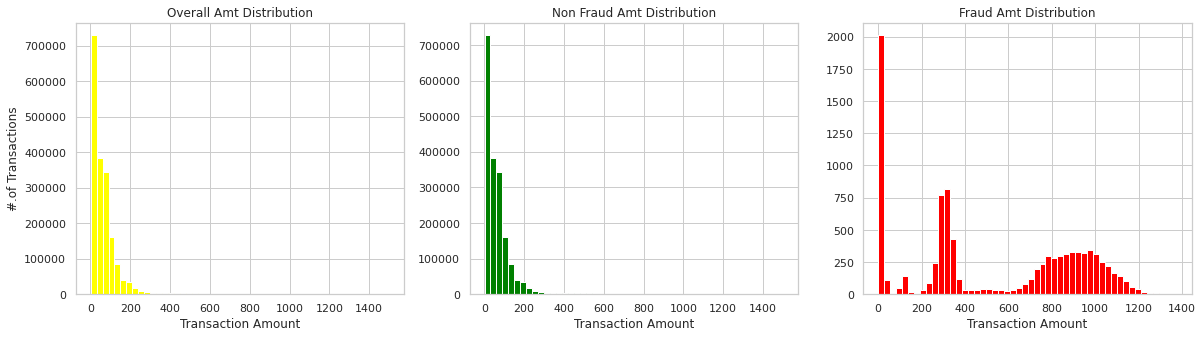

In [25]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(data[data['amt']<=1500]['amt'], bins=50,color='yellow')
ax[1].hist(data[(data['is_fraud']==0) & (data['amt']<=1500)]['amt'], bins=50, color='green')
ax[2].hist(data[(data['is_fraud']==1) & (data['amt']<=1500)]['amt'], bins=50, color='red')

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

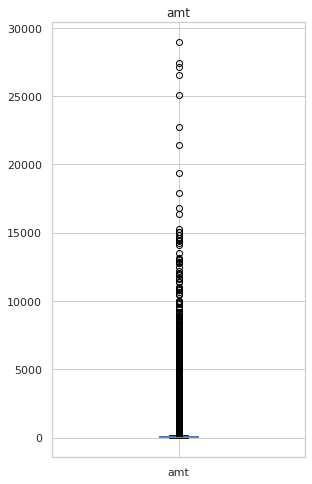

In [26]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    data[col].plot.box()
    plt.title(col)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff00652b750>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0065342d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7ff006521c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff006534d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff00653a310>],
 'means': []}

Text(0.5, 1.0, 'Range of amount ')

Text(0.5, 1.0, 'Range of amount ')

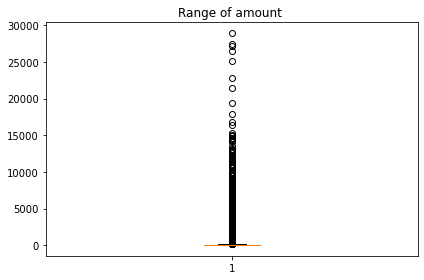

In [17]:
plt.boxplot(data['amt'],patch_artist=True) 
#axes[0].set_title('Distribution of Amount ')
axes[0].set_title('Range of amount ')
plt.title('Range of amount ')
plt.tight_layout()
#plt.savefig("hist of Amount.png" )
plt.show()

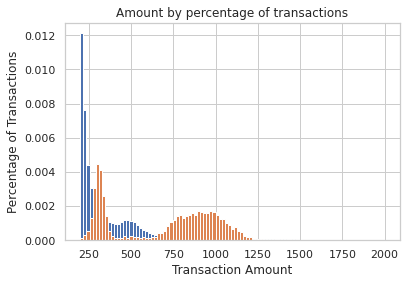

In [27]:
bins = np.linspace(200, 2000, 100)
plt.hist(data[(data['is_fraud']==0)]['amt'], bins,alpha=1, density=True, label='Non Fraud' )
plt.hist(data[(data['is_fraud']==1)]['amt'], bins,alpha=1, density=True, label='Fraud')

plt.title('Amount by percentage of transactions')

plt.xlabel('Transaction Amount')
plt.ylabel('Percentage of Transactions')
plt.show()

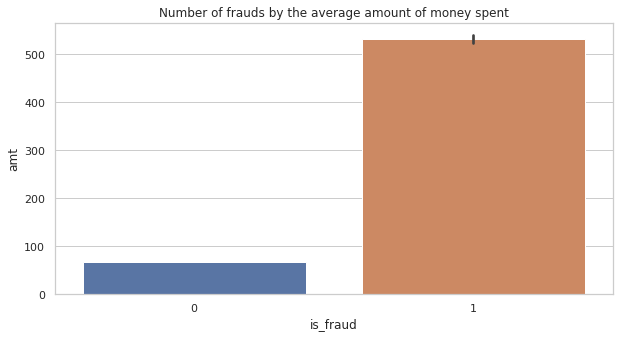

In [30]:
plt.figure(figsize=(10,5))
plt.title('Number of frauds by the average amount of money spent')
sns.barplot(x="is_fraud", y='amt', data=data)#takes bit longer time to run



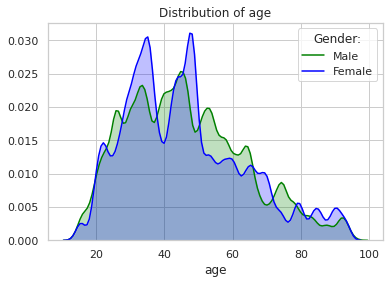

In [31]:
fig, ax = plt.subplots()
sns.distplot(data.loc[data.gender=='M', 'age'].dropna(),hist=False, color='green', kde_kws={"shade": True},ax=ax, label='Male')
sns.distplot(data.loc[data.gender=='F', 'age'].dropna(),hist=False, color='blue',kde_kws={"shade": True},ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

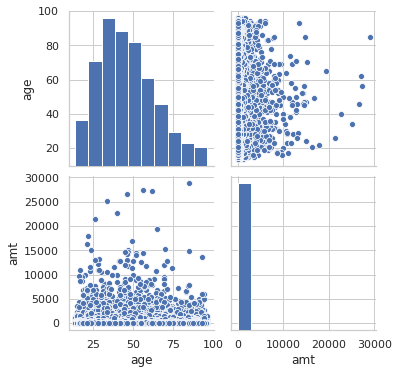

In [29]:
sns.pairplot(data[['age', 'amt']])

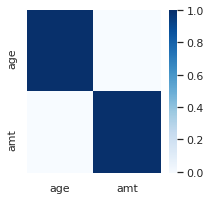

In [32]:
fig=plt.figure(figsize= (3,3)) 
sns.heatmap(data[['age','amt']].corr(), cmap='Blues')
plt.show()

In [33]:
data[['age','amt']].corr()

,age,amt
age,1.000000,-0.010738
amt,-0.010738,1.000000


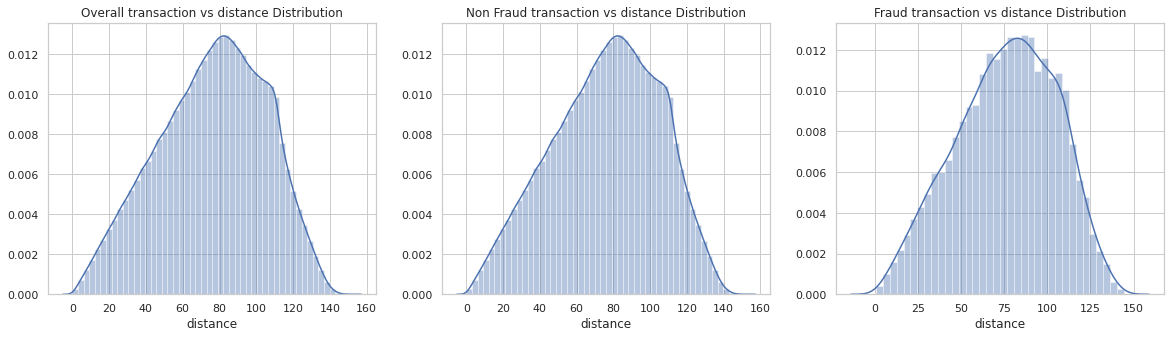

In [34]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['distance'], ax= ax[0])#age distributio
sns.distplot(data[(data['is_fraud']==0)].distance, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(data[(data['is_fraud']==1)].distance, ax= ax[2]) # age distribution for non fraudulent transaction 

ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()

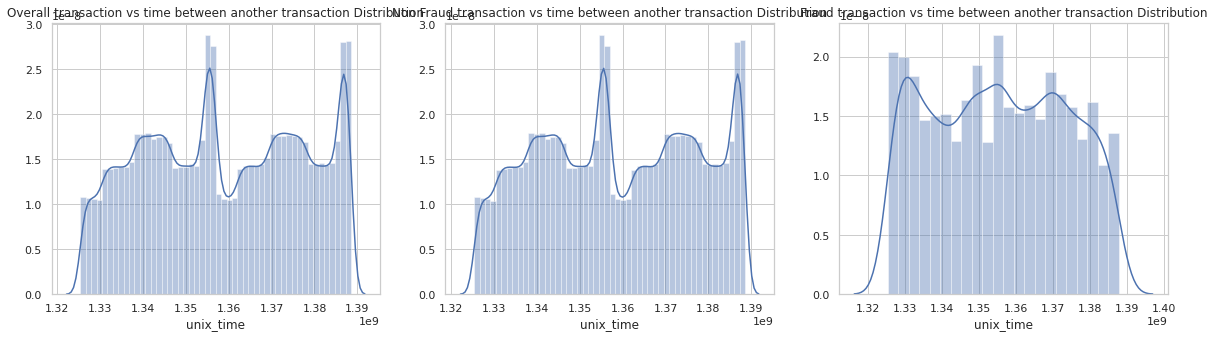

In [35]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['unix_time'], ax= ax[0])#age distributio
sns.distplot(data[(data['is_fraud']==0)].unix_time, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(data[(data['is_fraud']==1)].unix_time, ax= ax[2])
ax[0].set_title('Overall transaction vs time between another transaction Distribution')
ax[1].set_title('Non Fraud transaction vs time between another transaction Distribution')
ax[2].set_title('Fraud transaction vs time between another transaction Distribution')

plt.show()

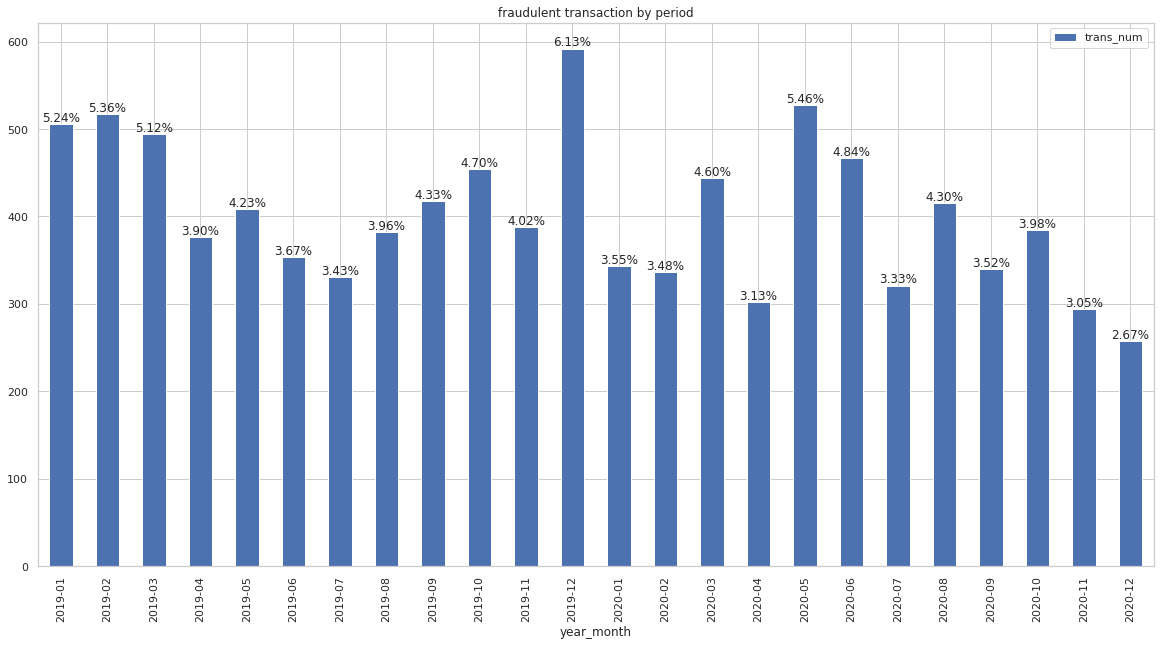

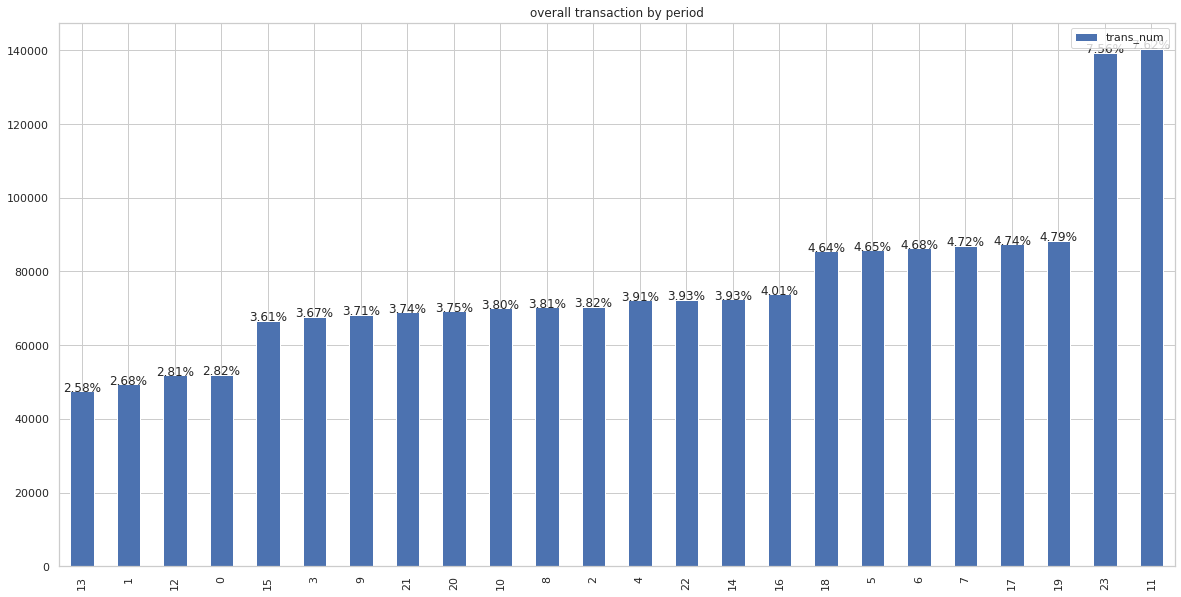

In [36]:
fraud = data[(data['is_fraud']==1)] # fraud df
not_fraud = data[(data['is_fraud']==0)] # non fraud dataframe

ax = fraud.groupby(fraud['year_month'])['trans_num'].nunique().reset_index().set_index('year_month').plot.bar(figsize=(20,10))
ax1 = not_fraud.groupby(not_fraud['year_month'])['trans_num'].nunique().reset_index().sort_values(by=['trans_num']).plot.bar(figsize=(20,10))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=12)
    
for t in ax1.patches:
    height = t.get_height()
    ax1.text(t.get_x()+t.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(not_fraud)*100),
            ha="center", fontsize=12) 
ax.set_title('fraudulent transaction by period')
ax1.set_title('overall transaction by period')
plt.show()

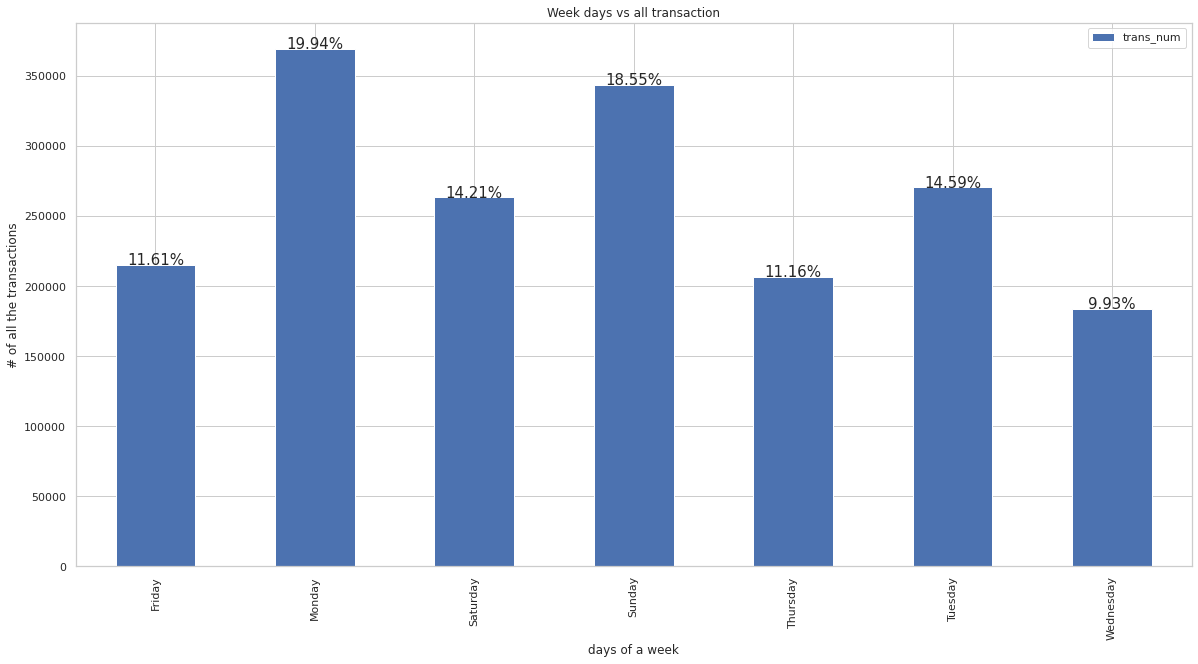

In [37]:
ax = data.groupby(data['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=15)
plt.show()

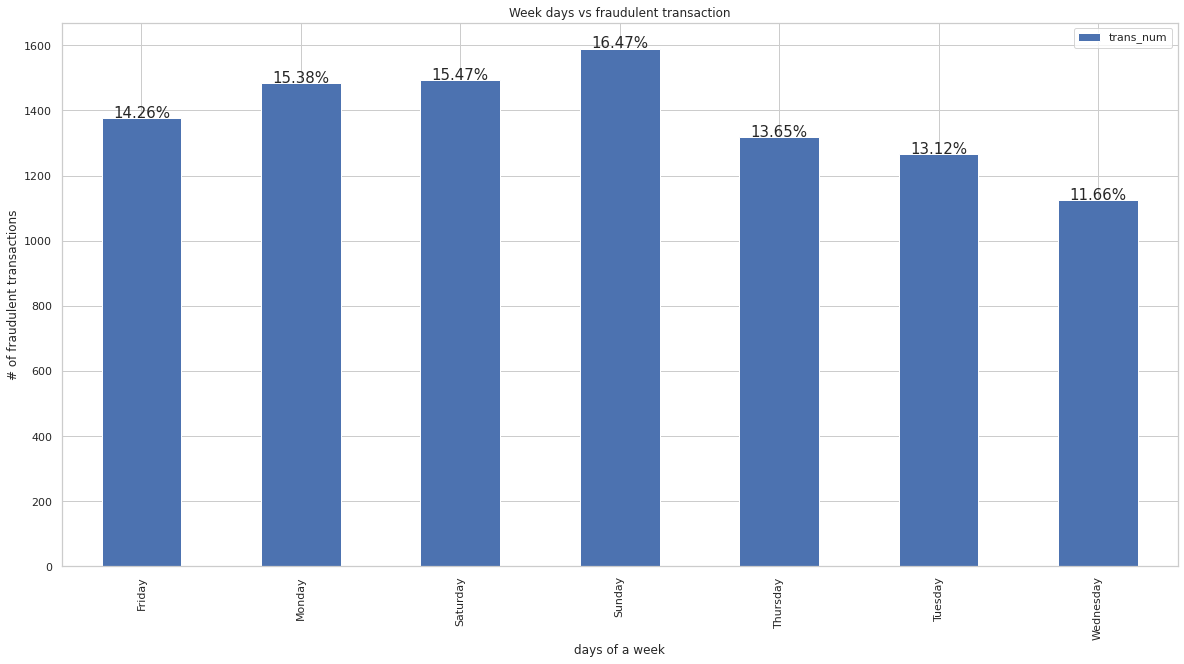

In [38]:
ax = fraud.groupby(fraud['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of fraudulent transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs fraudulent transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
plt.show()

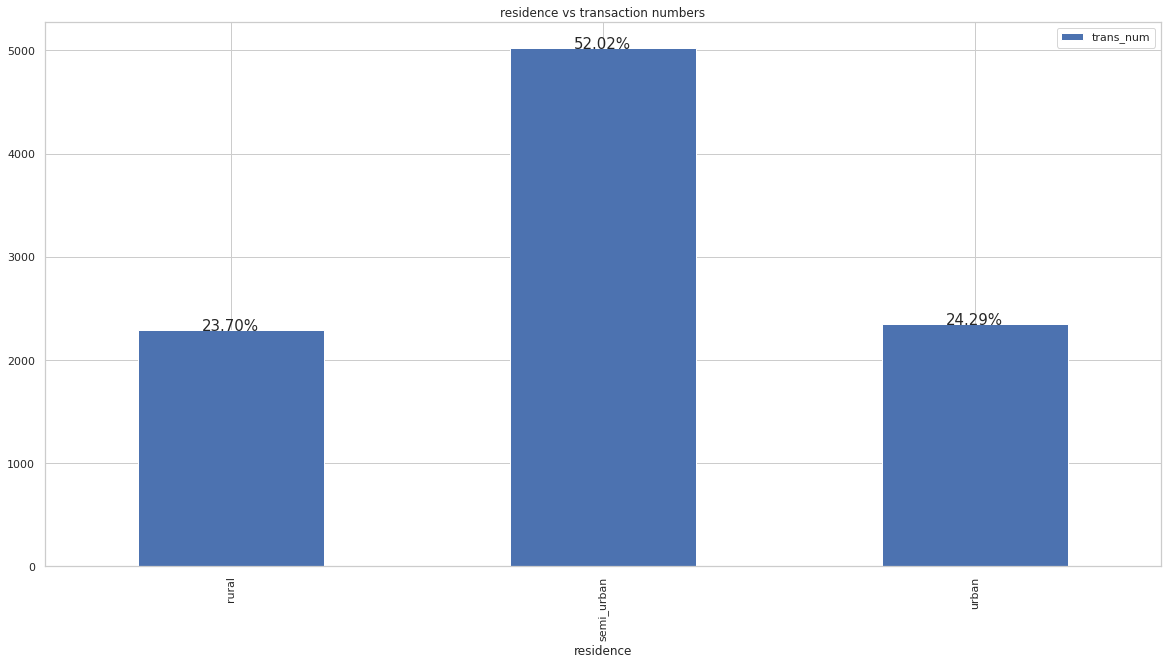

In [39]:
ax = fraud.groupby(fraud['residence'])['trans_num'].nunique().reset_index().set_index('residence').plot.bar(figsize=(20,10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
ax.set_title('residence vs transaction numbers')
plt.show()

* From the above figures we observed that the POS and ne t purchases have the high fraudulent compared o others
* There are not a big difference on the distribution of the fraudulent transaction and non fraudulent transacation
* From period transaction, there were more fraudulent transaction in 2019
* In a week, there were more fraudulent transaction on monday
* In the comparison, using the area, there were more fraudulent transaction in the semi-urban than others

## Multivariate Analysis

In [8]:
data.var().round(0)

cc_num        1.713783e+36
amt           2.536200e+04
zip           7.226336e+08
lat           2.600000e+01
long          1.890000e+02
city_pop      9.089478e+10
unix_time     3.310610e+14
merch_lat     2.600000e+01
merch_long    1.890000e+02
is_fraud      0.000000e+00
dtype: float64

* Using Correlation

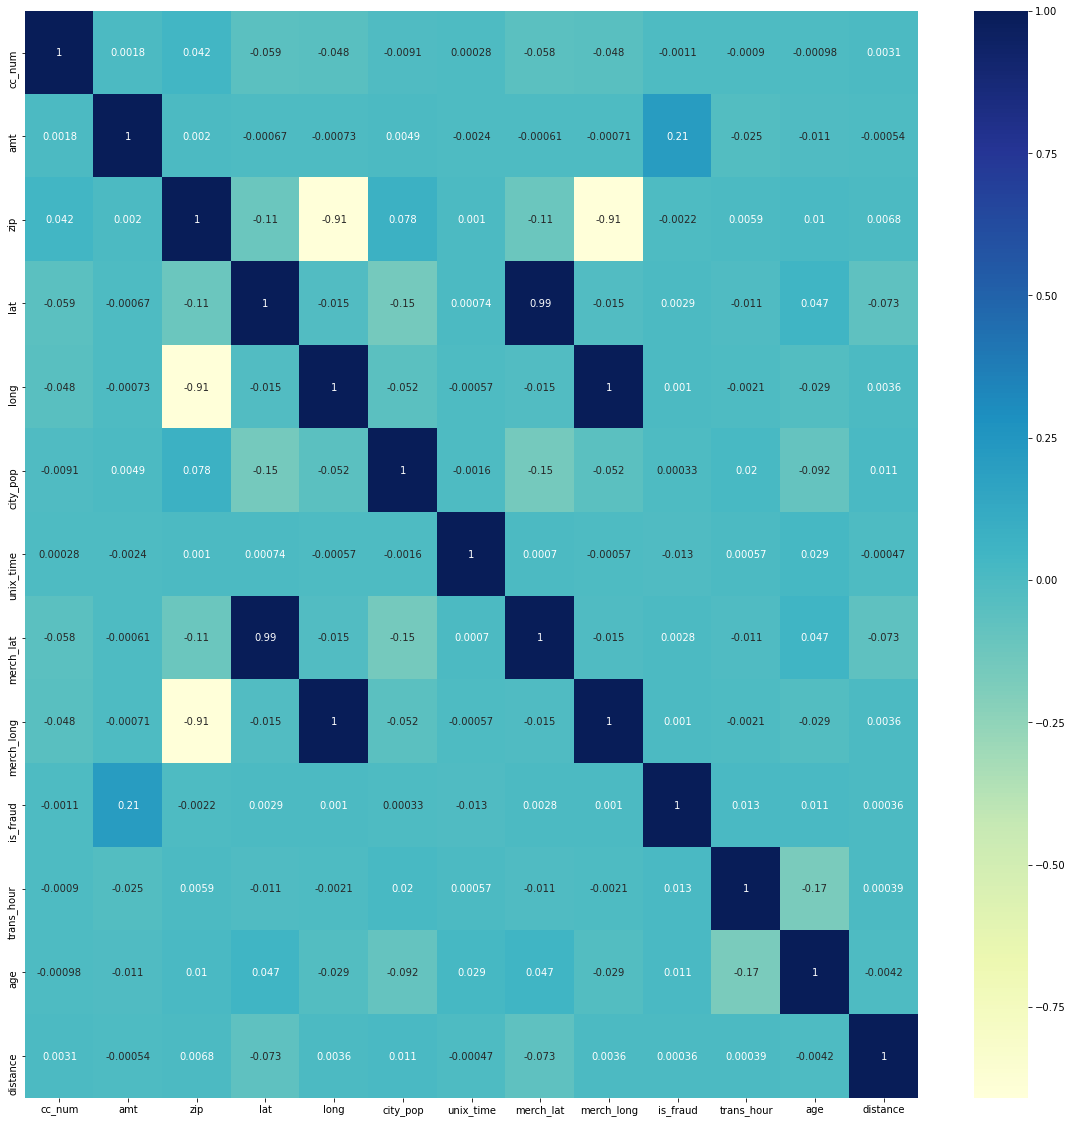

is_fraud      1.000000
amt           0.209308
unix_time     0.013329
trans_hour    0.013196
age           0.010685
lat           0.002904
merch_lat     0.002778
zip           0.002190
cc_num        0.001125
long          0.001022
merch_long    0.000999
distance      0.000359
city_pop      0.000325
Name: is_fraud, dtype: float64

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
plt.show()

data.corr()['is_fraud'].abs().sort_values(ascending=False)

* We can see here there are a high negative correlation between location (longititude and latitude of the clients and merchant location), ###  We can remove one of them

# Data Preparation

In [10]:
dframe = data.copy()
dframe = dframe.drop(['cc_num','trans_date_trans_time','names', 'merchant','trans_num','street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long','lat_long',
       'merch_ad','job','year_month'],axis=1)

In [11]:
# creating a dummy variable for ome of the categoorical variables and drop the first ones
dummy_var1 = pd.get_dummies(dframe[['category', 'day_of_week', 'gender', 'residence']], drop_first= True)
# adding the resultss to the master dataframe
dframe = pd.concat([dframe, dummy_var1], axis=1)
#dropping the repeated variables
dframe = dframe.drop(['category', 'day_of_week', 'gender', 'residence'],1)

In [12]:
from sklearn.preprocessing import RobustScaler
# select columns to scale 
to_scale = [col for col in dframe.columns if dframe[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(dframe[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    dframe[col] = scaled[col]

In [13]:
#make a copy of this dataframe
df = dframe.copy()

In [14]:
#pip install delayed

# Imbalance In Data

In [28]:
# Count the occurrences of fraud and no fraud in trainning data and print them
occ = data['is_fraud'].value_counts()
occ

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [29]:
# Print the ratio of fraud cases in trainning data
ratio_cases = occ/len(data.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.005210014716091717
Ratio of non-fraudulent cases: 0.9947899852839083


The ratio of fraudulent transactions is very low. This is a case of class imbalance problem, and we will deal with this in the next sections.

Text(0, 0.5, 'Frequency')

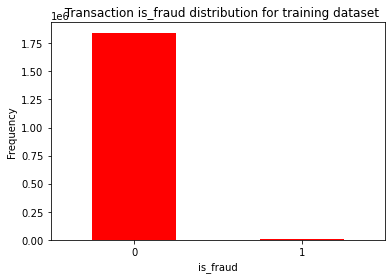

In [14]:
count_classes = pd.value_counts(data['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="r")
plt.title("  Transaction is_fraud distribution for training dataset")
#plt.xticks(range(2), LABELS)
plt.xlabel("is_fraud")
plt.ylabel("Frequency")

# Model Building

In [14]:
#!pip install imblearn
#!pip install  delayed
#!pip install sklearn


In [68]:
# import libraries needed for this step
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve # classification metrics
#from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

import sklearn.neighbors
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
import statsmodels.api as sm # estimates statistical models
from sklearn.feature_selection import RFE #Recursive Feature Elimination for feature selection
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
X = df.drop(['is_fraud'],axis=1) 
y = df['is_fraud'] #target variable

## Test Train Split

In [70]:
#split the dataset into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)

## Resampling using Random Undersampling
Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [71]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_train_rus,y_train_rus = rus.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying RandomUnderSampler: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying RandomUnderSampler: ', X_train_rus.shape,y_train_rus.shape)
print('Distribution of label values after applying RandomUnderSampler: \n', pd.Series(y_train_rus).value_counts())

Feature/label dataset for training before applying RandomUnderSampler:  (1296675, 27) (1296675,)
Feature/label dataset for training after applying RandomUnderSampler:  (13576, 27) (13576,)
Distribution of label values after applying RandomUnderSampler: 
 1    6788
0    6788
Name: is_fraud, dtype: int64


Text(0.5, 1.0, 'Before Undersampling')

Text(0.5, 1.0, 'After Undersampling')

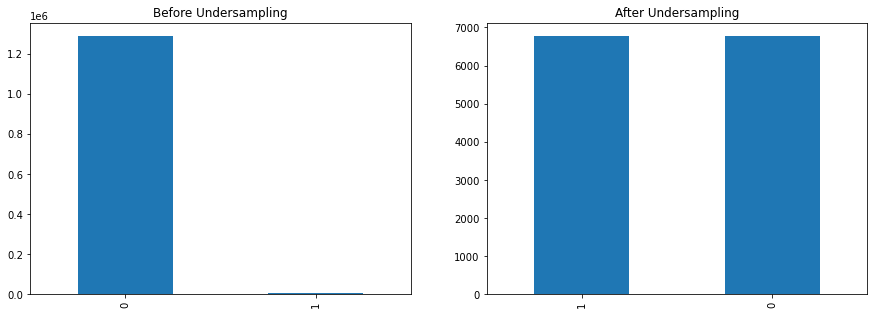

In [72]:
# to demonstrate the effect of Undersampling over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before Undersampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After Undersampling')  
pd.Series(y_train_rus).value_counts().plot.bar(ax=ax2)

plt.show()

In [18]:
#(X_train, y_train.ravel())

## RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying RandomOverSampler: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying RandomOverSampler: ', X_train_ros.shape, y_train_ros.shape)
print('Distribution of label values after applying RandomOverSampler: \n', pd.Series(y_train_ros).value_counts())

In [73]:
# logistic regression model
logml = sm.GLM(y_train_rus,(sm.add_constant(X_train_rus)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                13576
Model:                            GLM   Df Residuals:                    13548
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6451.5
Date:                Fri, 03 Dec 2021   Deviance:                       12903.
Time:                        03:50:31   Pearson chi2:                 1.41e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8619      0.127    -14.611      0.000      -2.112      -1.612
amt                         0.4460      0.012     36.732      0.000       0.422       0.470
unix_time                  -0.5655      0.055    -10.304      0.000      -0.673      -0.458
trans_hour                  0.3829      0.040      9.535      0.000       0.304       0.462
age                         0.0475      0.030      1.592      0.111      -0.011       0.106
distance                    0.0088      0.032      0.275      0.783      -0.054       0.072
category_food_dining        0.4996      0.140      3.571      0.000       0.225       0.774
category_gas_transport      1.8539      0.125     14.875      0.000       1.610       2.098
category_grocery_net        1.3323      0.158      8.412      0.000       1.022       1.643
category_grocery_pos        1.9487      0.115     16.881      0.000       1.722       2.175
category_health_fitness     0.5736      0.144      3.996      0.000       0.292       0.855
category_home               0.1027      0.134      0.764      0.445      -0.161       0.366
category_kids_pets          0.5187      0.133      3.894      0.000       0.258       0.780
category_misc_net           1.3106      0.137      9.556      0.000       1.042       1.579
category_misc_pos           1.0169      0.138      7.385      0.000       0.747       1.287
category_personal_care      0.8577      0.135      6.363      0.000       0.594       1.122
category_shopping_net       1.3699      0.126     10.900      0.000       1.124       1.616
category_shopping_pos       0.4170      0.133      3.139      0.002       0.157       0.677
category_travel             1.0420      0.164      6.359      0.000       0.721       1.363
day_of_week_Monday         -0.4606      0.079     -5.831      0.000      -0.615      -0.306
day_of_week_Saturday       -0.0973      0.082     -1.192      0.233      -0.257       0.063
day_of_week_Sunday         -0.2323      0.079     -2.954      0.003      -0.386      -0.078
day_of_week_Thursday       -0.0182      0.084     -0.216      0.829      -0.184       0.147
day_of_week_Tuesday        -0.2463      0.082     -2.988      0.003      -0.408      -0.085
day_of_week_Wednesday       0.1157      0.088      1.313      0.189      -0.057       0.288
gender_M                   -0.0957      0.044     -2.186      0.029      -0.181      -0.010
residence_semi_urban        0.1019      0.054      1.900      0.057      -0.003       0.207
residence_urban            -0.0529      0.063     -0.841      0.400      -0.176       0.070
===========================================================================================
"""

- The above all p values are statistically significant
- The next step, we are going to check which variables have high importance for this model

## Feature selection using Recursive Feature Elimination

In [74]:
# look for best describiing features for the logistic regression model using rfe
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train_rus, y_train_rus)


In [75]:
logreg.fit(X_train_rus, y_train_rus)
y_test_pred = logreg.predict(X_test)

LogisticRegression()

In [76]:
# have a look on the list of features and the ranking they gets 
list(zip(X_train_rus.columns, rfe.support_, rfe.ranking_))
## What is the criteria here to eliminate the features for ranking here

[('amt', True, 1),
 ('unix_time', True, 1),
 ('trans_hour', True, 1),
 ('age', False, 12),
 ('distance', False, 15),
 ('category_food_dining', False, 3),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', False, 14),
 ('category_kids_pets', False, 2),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', True, 1),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', False, 4),
 ('category_travel', True, 1),
 ('day_of_week_Monday', True, 1),
 ('day_of_week_Saturday', False, 10),
 ('day_of_week_Sunday', False, 6),
 ('day_of_week_Thursday', False, 13),
 ('day_of_week_Tuesday', False, 5),
 ('day_of_week_Wednesday', False, 7),
 ('gender_M', False, 9),
 ('residence_semi_urban', False, 8),
 ('residence_urban', False, 11)]

In [77]:
# extract all the columns selected by rfe as best variable for our model
col = X_train_rus.columns[rfe.support_]

In [78]:
#remove those with less important features
X_train_rus.columns[~rfe.support_]

Index(['age', 'distance', 'category_food_dining', 'category_home',
       'category_kids_pets', 'category_shopping_pos', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'gender_M', 'residence_semi_urban',
       'residence_urban'],
      dtype='object')

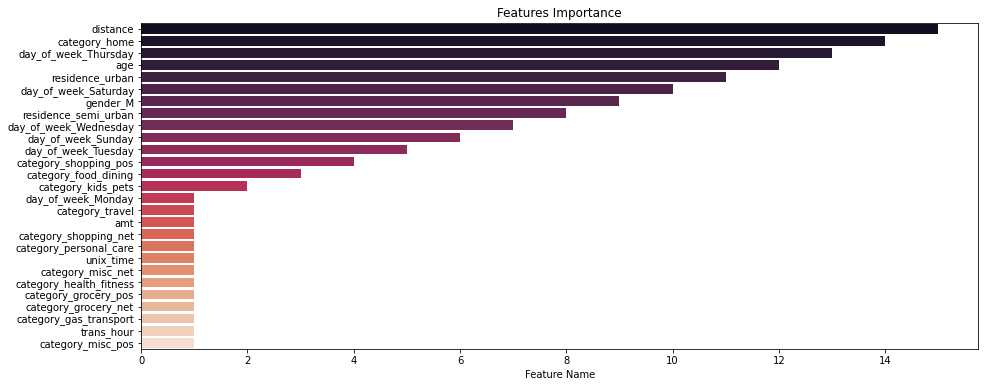

In [79]:
feature_imp = pd.DataFrame(list(zip(X_train_rus.columns, rfe.support_, rfe.ranking_)), columns=['variables','selected','rank'])
feature_imp = feature_imp.set_index('variables')

plt.figure(figsize=[15,6])
plt.title('Features Importance')
sns.barplot(x='rank', y=feature_imp.index.values, data=feature_imp, 
            order=feature_imp.sort_values(by='rank', ascending=False).index.values, palette='rocket', )
plt.xlabel('Feature Name');

From the code above we can observe that from the distance variable is really important with the rank over 12, and from category-home, day_of_week_thursday, and age are top in importance while category misc pos have a really low rank

In [80]:
# build a logistic regression using only the variables selected using rfe
X_train_sm = sm.add_constant(X_train_rus[col])

logml2 = sm.GLM(y_train_rus, X_train_sm, family=sm.families.Binomial())

res = logml2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                13576
Model:                            GLM   Df Residuals:                    13562
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6488.2
Date:                Fri, 03 Dec 2021   Deviance:                       12976.
Time:                        03:50:40   Pearson chi2:                 1.07e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.6308      0.049    -33.202      0.000      -1.727      -1.535
amt                         0.4382      0.012     37.841      0.000       0.416       0.461
unix_time                  -0.5577      0.055    -10.228      0.000      -0.665      -0.451
trans_hour                  0.3713      0.040      9.396      0.000       0.294       0.449
category_gas_transport      1.5279      0.080     19.103      0.000       1.371       1.685
category_grocery_net        0.9850      0.126      7.798      0.000       0.737       1.233
category_grocery_pos        1.6283      0.069     23.600      0.000       1.493       1.764
category_health_fitness     0.2535      0.107      2.369      0.018       0.044       0.463
category_misc_net           0.9863      0.100      9.890      0.000       0.791       1.182
category_misc_pos           0.6951      0.099      7.003      0.000       0.501       0.890
category_personal_care      0.5539      0.095      5.840      0.000       0.368       0.740
category_shopping_net       1.0467      0.082     12.711      0.000       0.885       1.208
category_travel             0.7292      0.133      5.499      0.000       0.469       0.989
day_of_week_Monday         -0.3643      0.057     -6.348      0.000      -0.477      -0.252
===========================================================================================
"""

In [81]:
## getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred =y_train_pred.values.reshape(-1)

In [82]:
# put in the dataframe the probability calculated for fraud
y_train_pred_final = pd.DataFrame({'fraud':y_train_rus, 'fraud_Prob': y_train_pred})
y_train_pred_final.head()

,fraud,fraud_Prob
0,0,0.192010
1,0,0.294965
2,0,0.169066
3,0,0.127170
4,0,0.184337


In [83]:
# creating new column 'predicted' with 1 if fraud_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.sample(50)

,fraud,fraud_Prob,predicted
13329,1,0.238508,0
4056,0,0.212442,0
5604,0,0.188316,0
11310,1,0.507415,1
12883,1,0.501110,1
8925,1,0.258948,0
12917,1,0.235519,0
6224,0,0.243877,0
7724,1,0.988359,1
13257,1,0.325539,0


Text(0.5, 1.0, ' Confusion Matrix \n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, '0'), Text(1.5, 0, '1')]

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

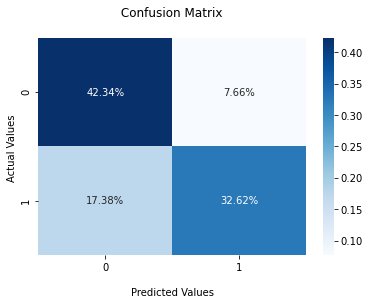

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      6788
           1       0.81      0.65      0.72      6788

    accuracy                           0.75     13576
   macro avg       0.76      0.75      0.75     13576
weighted avg       0.76      0.75      0.75     13576



In [84]:
#ax = sb.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')
cf_matrix=confusion_matrix(y_train_pred_final.fraud, y_train_pred_final.predicted)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_title(' Confusion Matrix \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.savefig("cf_matrix_KNN.png",bbox_inches='tight' )
plt.show()

#sns.heatmap(confusion_matrix(y_train_pred_final.fraud, y_train_pred_final.predicted),annot=True, fmt='.2')
#plt.show()
print(classification_report(y_train_pred_final.fraud, y_train_pred_final.predicted))

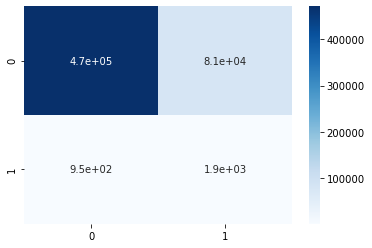

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    552856
           1       0.02      0.67      0.04      2863

    accuracy                           0.85    555719
   macro avg       0.51      0.76      0.48    555719
weighted avg       0.99      0.85      0.92    555719



In [85]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, cmap='Blues')
plt.show()
print(classification_report(y_test, y_test_pred))

## Logistic Regression Model

In [86]:
#Building a Logistic Regression Model

lr = LogisticRegression()
model_v1 = lr.fit(X_train_rus,y_train_rus)

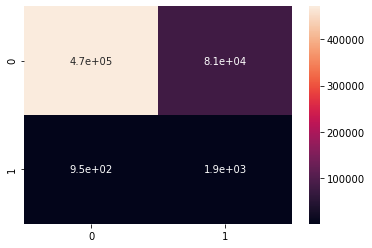

In [87]:
#  predict and confusion matrix

ypred = model_v1.predict(X_test)
cm  = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [88]:
#classification report
print(classification_report(y_test,ypred))
logistic_acc = accuracy_score(y_test,ypred)*100
print("Logistic regression accuracy =", logistic_acc)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    552856
           1       0.02      0.67      0.04      2863

    accuracy                           0.85    555719
   macro avg       0.51      0.76      0.48    555719
weighted avg       0.99      0.85      0.92    555719

Logistic regression accuracy = 85.17920027927784


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC Curve')

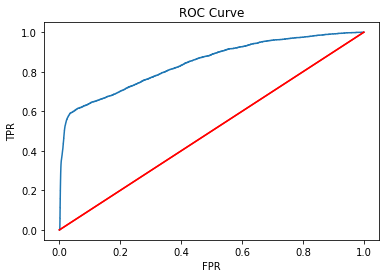

In [89]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# Decision Tree Model

DecisionTreeClassifier(max_depth=20, random_state=0)

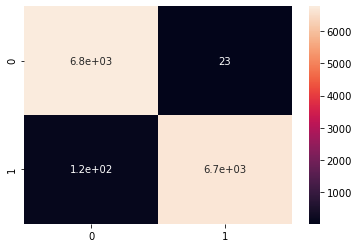

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6788
           1       1.00      0.98      0.99      6788

    accuracy                           0.99     13576
   macro avg       0.99      0.99      0.99     13576
weighted avg       0.99      0.99      0.99     13576



In [90]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_rus, y_train_rus)
pred_train = dt_clf.predict(X_train_rus)

sns.heatmap(confusion_matrix(y_train_rus, pred_train), annot=True)
plt.show()
print(classification_report(y_train_rus, pred_train))

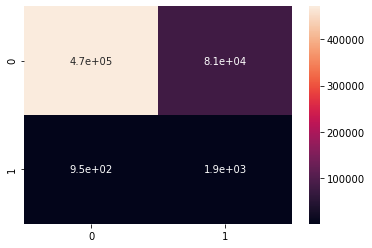

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    552856
           1       0.02      0.67      0.04      2863

    accuracy                           0.85    555719
   macro avg       0.51      0.76      0.48    555719
weighted avg       0.99      0.85      0.92    555719

Decision Tree accuracy = 85.17920027927784
Decision Tree precision = 2.293539443837688
Decision Tree F1 score = 4.434697855750488
Decision Tree recall = 66.74816625916871


In [96]:
pred_test = dt_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True)
plt.show()
print(classification_report(y_test, y_test_pred))
dt_acc = accuracy_score(y_test,y_test_pred)*100
dt_precision = precision_score(y_test,y_test_pred)*100
dt_f1_score = f1_score(y_test,y_test_pred)*100
#print('Recall: %.3f' % recall_score(y_test, y_pred))
dt_recall = recall_score(y_test,y_test_pred)*100
print("Decision Tree accuracy =" , dt_acc)
print("Decision Tree precision =" , dt_precision)
print("Decision Tree F1 score =" , dt_f1_score)
print("Decision Tree recall =" , dt_recall)

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC Curve')

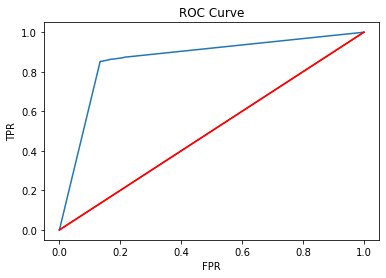

In [63]:
## Decision Tree Classifier
prob2 = dt_clf.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

## Random-Forest Classifier

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomForestClassifier(max_depth=20, n_estimators=50, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


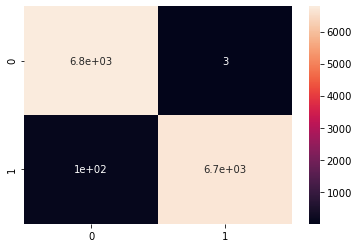

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6788
           1       1.00      0.99      0.99      6788

    accuracy                           0.99     13576
   macro avg       0.99      0.99      0.99     13576
weighted avg       0.99      0.99      0.99     13576



In [41]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,verbose = 1)
rf_clf.fit(X_train_rus, y_train_rus)
pred_train = rf_clf.predict(X_train_rus)

sns.heatmap(confusion_matrix(y_train_rus, pred_train), annot=True)
plt.show()
print(classification_report(y_train_rus, pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.4s finished


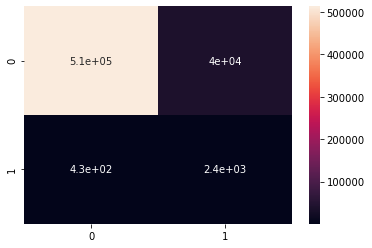

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    552856
           1       0.06      0.85      0.11      2863

    accuracy                           0.93    555719
   macro avg       0.53      0.89      0.53    555719
weighted avg       0.99      0.93      0.96    555719

Random Forest accuracy = 92.74759365794584


In [42]:
pred_test = rf_clf.predict(X_test)

sns.heatmap(confusion_matrix(y_test, pred_test), annot= True)
plt.show()
print(classification_report(y_test, pred_test))
rf_acc = accuracy_score(y_test,pred_test)*100
print("Random Forest accuracy =" , rf_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.4s finished


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC Curve')

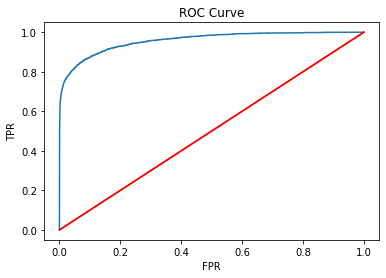

In [43]:
## Random Forest Classifier
prob1 = rf_clf.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

## Naive Bayes model

In [44]:
#Naive Bayes model
nb =GaussianNB()
model_v3 = nb.fit(X_train_rus,y_train_rus)

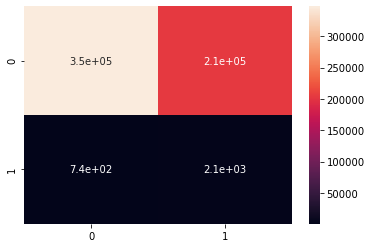

In [45]:
y_pred2 = model_v3.predict(X_test)
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)

In [46]:
print(classification_report(y_test,y_pred2))
nb_acc = accuracy_score(y_test,y_pred2)*100
print("Naive Bayes accuracy =" , nb_acc)

              precision    recall  f1-score   support

           0       1.00      0.63      0.77    552856
           1       0.01      0.74      0.02      2863

    accuracy                           0.63    555719
   macro avg       0.50      0.69      0.40    555719
weighted avg       0.99      0.63      0.77    555719

Naive Bayes accuracy = 62.96203656884145


Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR')

Text(0.5, 1.0, 'ROC Curve')

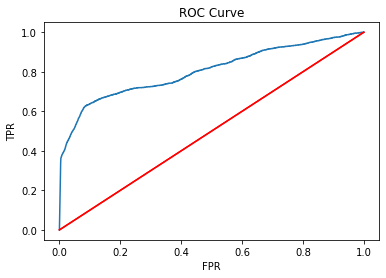

In [47]:
## Naive Bayes Model
prob2 = model_v3.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# Comparing Accuracies

In [97]:
labels = [ "Logistic Regression" ,"Decision Tree", "Random Forest", "Naive Bayes"]
x = [logistic_acc, dt_acc,rf_acc ,nb_acc]
eval_frame = pd.DataFrame()
eval_frame['Model'] = labels
eval_frame['Accuracy'] = x
eval_frame
eval_frame.to_csv("Accuracies.csv",index=True)

,Model,Accuracy
0,Logistic Regression,85.179200
1,Decision Tree,85.179200
2,Random Forest,92.747594
3,Naive Bayes,62.962037


# define cross-validation method to use

In [49]:
from sklearn.model_selection import KFold

In [50]:
kfold = KFold(n_splits=10)

In [51]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers1 = []

In [52]:
classifiers1.append(LogisticRegression(random_state = 2))
classifiers1.append(DecisionTreeClassifier())
classifiers1.append(RandomForestClassifier())
classifiers1.append(GaussianNB())

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
accuracy_results1 = []
for a in classifiers1 :
    accuracy_results1.append(cross_val_score(a,X_train_rus, y_train_rus, scoring = "accuracy", cv = kfold))

In [56]:
accuracy_results1
#accuracy_results1.to_csv("Accuracy results for 10 fold Cross validation.csv",index=True)

[array([0.7916053 , 0.75994109, 0.79086892, 0.79970545, 0.78865979,
        0.61119293, 0.633014  , 0.60501105, 0.61680177, 0.62048637]),
 array([0.82400589, 0.81958763, 0.81222386, 0.82621502, 0.8011782 ,
        0.84315169, 0.83861459, 0.83566691, 0.84745763, 0.81871776]),
 array([0.910162  , 0.89543446, 0.91458027, 0.90279823, 0.910162  ,
        0.82179676, 0.8238762 , 0.81061164, 0.82461312, 0.81724392]),
 array([0.60014728, 0.60603829, 0.61340206, 0.61561119, 0.60677467,
        0.74521355, 0.74281503, 0.72881356, 0.72881356, 0.72807664])]

In [57]:
accuracy_means1 = []
for e in accuracy_results1:
    accuracy_means1.append(e.mean()*100)
accuracy_means1

[70.17286681289295, 82.66819187695285, 86.31278604476, 67.15705831216091]

In [98]:
eval_frame[' 10 folds']=accuracy_means1
eval_frame
eval_frame.to_csv("Cross Validation.csv",index=True)

,Model,Accuracy,10 folds
0,Logistic Regression,85.179200,70.172867
1,Decision Tree,85.179200,82.668192
2,Random Forest,92.747594,86.312786
3,Naive Bayes,62.962037,67.157058


# Conclusion

For evaluation of our machine learning models, we will use accuracy and ROC curve.
Random Forest Classifier gave the best ROC curve followed by Decision Tree and Logistic Regression then Naive Bayes.  Also from accuracy score, Random Forest has highest accuracy  92.75 and Naive Bayes has lowest accuracy of 62.96.
Decision Tree Classifier has sharp elbow in ROC curve , it can be the best model to give a prediction among all four models.

# Prediction

In [59]:
y_pred = dt_clf.predict(X_test)

In [60]:
prediction = pd.DataFrame()
prediction['Serial No.'] = X_test.index
prediction['is_fraud_pred'] = y_pred

In [61]:
prediction[prediction['is_fraud_pred']==1]

,Serial No.,is_fraud_pred
0,240689,1
5,451600,1
9,261806,1
17,159021,1
20,219234,1
...,...,...
555697,456231,1
555699,399700,1
555700,465533,1
555709,464471,1
